In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind, f_oneway
import statsmodels.api as sm

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/DS & ML/Assignments/Statistical Data Analysis/retail_fashion_dataset.xlsx')
df

,CustomerID,Gender,Age,Location,Membership,AnnualIncome,ProductCategory,AmountSpent,ItemsPurchased,SatisfactionRating,Returned,PaymentMethod
0,1,Male,33,Dhaka,Platinum,573959,Accessories,3878.15,0,3,Yes,COD
1,2,Other,18,Dhaka,Regular,1282335,Traditional Wear,2753.63,3,3,No,COD
2,3,Female,35,Sylhet,Platinum,1103278,Bottoms,3591.77,4,4,No,Nagad
3,4,Female,38,Sylhet,Platinum,920423,Accessories,3863.37,4,2,No,Nagad
4,5,Male,37,Dhaka,Gold,814407,Traditional Wear,3335.53,5,2,No,Nagad
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Male,18,Chattogram,Regular,575301,Shoes,3025.29,5,2,No,Nagad
996,997,Other,25,Khulna,Regular,848576,Bottoms,2418.40,3,2,No,Credit Card
997,998,Male,31,Rangpur,Gold,383580,Tops,1488.30,2,4,No,Credit Card
998,999,Other,27,Rajshahi,Gold,910629,Traditional Wear,1153.46,0,3,No,Nagad


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Location,0
Membership,0
AnnualIncome,0
ProductCategory,0
AmountSpent,0
ItemsPurchased,0
SatisfactionRating,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          1000 non-null   int64  
 1   Gender              1000 non-null   object 
 2   Age                 1000 non-null   int64  
 3   Location            1000 non-null   object 
 4   Membership          1000 non-null   object 
 5   AnnualIncome        1000 non-null   int64  
 6   ProductCategory     1000 non-null   object 
 7   AmountSpent         1000 non-null   float64
 8   ItemsPurchased      1000 non-null   int64  
 9   SatisfactionRating  1000 non-null   int64  
 10  Returned            1000 non-null   object 
 11  PaymentMethod       1000 non-null   object 
dtypes: float64(1), int64(5), object(6)
memory usage: 93.9+ KB


In [ ]:
# numerical_cols = ['Age']

numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('CustomerID')
numerical_cols

['Age', 'AnnualIncome', 'AmountSpent', 'ItemsPurchased', 'SatisfactionRating']

In [ ]:
df.select_dtypes(include=np.number).drop(columns=['CustomerID']).describe()

,Age,AnnualIncome,AmountSpent,ItemsPurchased,SatisfactionRating
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,32.796000,7.975050e+05,3038.726240,3.022000,3.031000
std,9.254298,2.043810e+05,998.296348,1.765399,1.421992
min,18.000000,2.141100e+05,500.000000,0.000000,1.000000
25%,26.000000,6.532608e+05,2342.557500,2.000000,2.000000
50%,32.000000,8.015055e+05,3024.135000,3.000000,3.000000
75%,39.000000,9.330095e+05,3707.177500,4.000000,4.000000
max,63.000000,1.448618e+06,7052.550000,11.000000,5.000000


**Checking outliers for all the numericals cols**

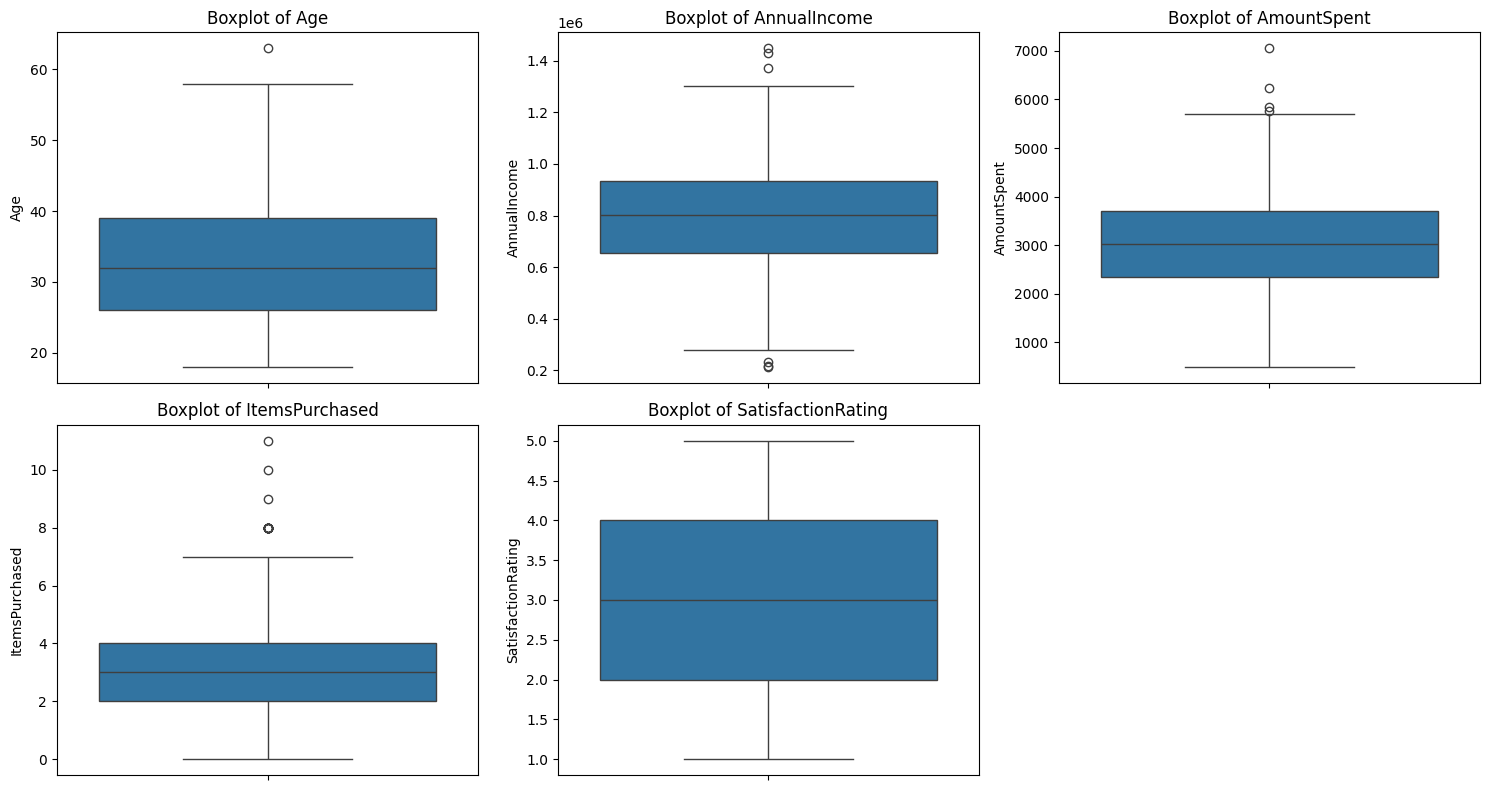

In [ ]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols):
  plt.subplot(2, 3, i+1)
  sns.boxplot(df[col])
  plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

**4** outliers detected

In [ ]:
# Let's use interquartile range (IQR) for AmountSpent col

Q1 = df['AmountSpent'].quantile(0.25)
Q3 = df['AmountSpent'].quantile(0.75)

IQR = Q3 - Q1
outlier_threshold = Q3 + 1.5 * IQR

outliers = df[df['AmountSpent'] > outlier_threshold]
print(outliers)

     CustomerID  Gender  Age  ... SatisfactionRating Returned  PaymentMethod
113         114  Female   43  ...                  5       No          bKash
283         284    Male   18  ...                  1       No            COD
371         372    Male   18  ...                  3       No          bKash
861         862  Female   46  ...                  5       No            COD

[4 rows x 12 columns]


In [ ]:
# Handle categorical cols

categorical_cols = df.select_dtypes(include='object').columns
print(categorical_cols)

for col in categorical_cols:
  print(f"\n{col}: {df[col].unique()}")

Index(['Gender', 'Location', 'Membership', 'ProductCategory', 'Returned',
       'PaymentMethod'],
      dtype='object')

Gender: ['Male' 'Other' 'Female']

Location: ['Dhaka' 'Sylhet' 'Khulna' 'Mymensingh' 'Barisal' 'Rajshahi' 'Chattogram'
 'Rangpur']

Membership: ['Platinum' 'Regular' 'Gold' 'Silver']

ProductCategory: ['Accessories' 'Traditional Wear' 'Bottoms' 'Tops' 'Shoes']

Returned: ['Yes' 'No']

PaymentMethod: ['COD' 'Nagad' 'Debit Card' 'bKash' 'Credit Card']


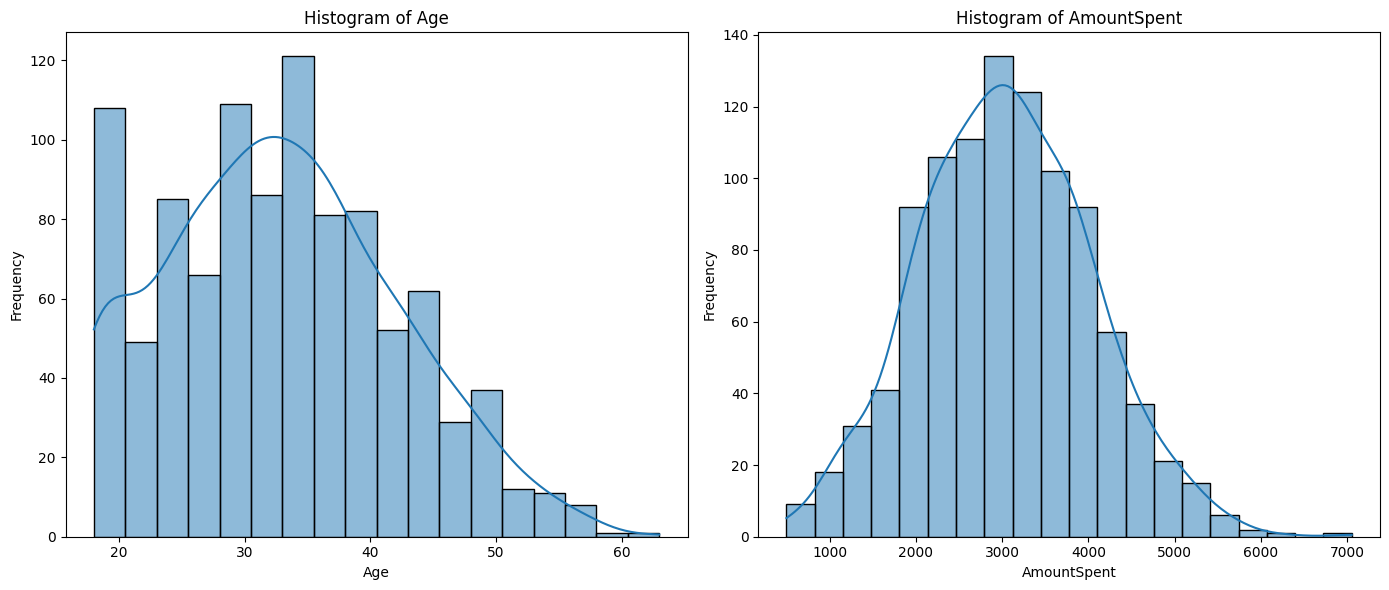

In [ ]:
plt.figure(figsize=(14, 6))

# Histogram for Age
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Histogram for AmountSpent
plt.subplot(1, 2, 2)
sns.histplot(df['AmountSpent'], bins=20, kde=True)
plt.title('Histogram of AmountSpent')
plt.xlabel('AmountSpent')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

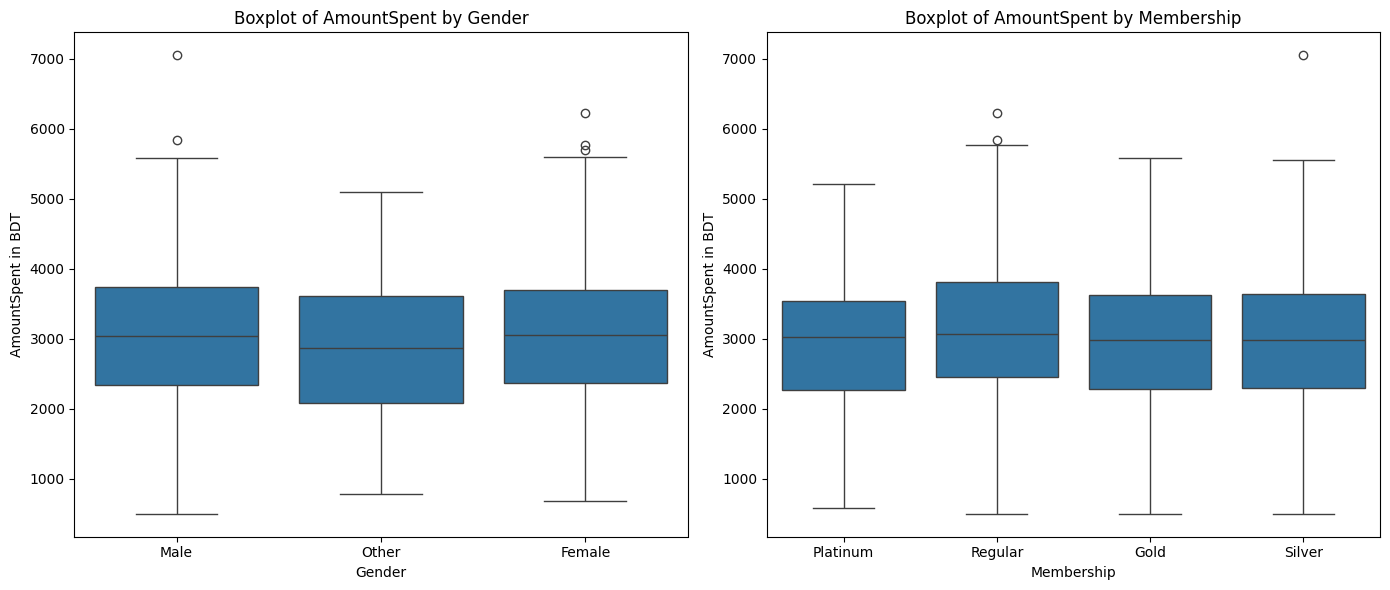

In [ ]:
plt.figure(figsize=(14, 6))

# Box-plot for AmountSpent by Gender
plt.subplot(1, 2, 1)
sns.boxplot(x='Gender', y='AmountSpent', data=df)
plt.title('Boxplot of AmountSpent by Gender')
plt.xlabel('Gender')
plt.ylabel('AmountSpent in BDT')

# Box-plot for AmountSpent by Membership
plt.subplot(1, 2, 2)
sns.boxplot(x='Membership', y='AmountSpent', data=df)
plt.title('Boxplot of AmountSpent by Membership')
plt.xlabel('Membership')
plt.ylabel('AmountSpent in BDT')

plt.tight_layout()
plt.show()

**Boxplot of AmountSpent by Gender**

Here, male and female has almost identical plot but for other gender there is slightly lower. So it means gender doesn't effect when considering the money they are spending.

**Boxplot of AmountSpent by Membership**

Here, gold and silver members are similar and platinum members spending money is slight less than them. Surprisingly regular members spending is more than any premium members which is not should happen.

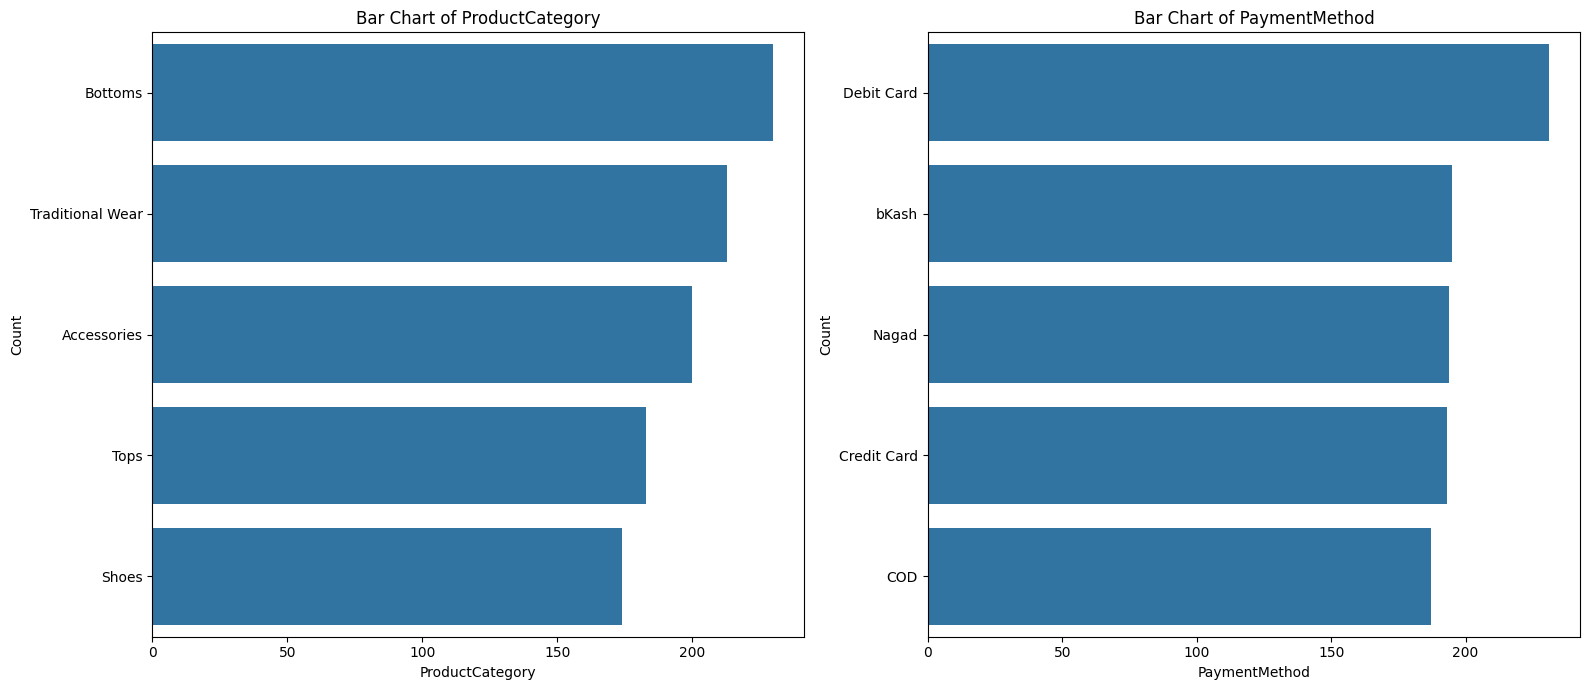

In [ ]:
plt.figure(figsize=(16, 7))

# Bar chart for ProductCategory
plt.subplot(1, 2, 1)
sns.countplot(y='ProductCategory', data=df, order=df['ProductCategory'].value_counts().index)
plt.title('Bar Chart of ProductCategory')
plt.xlabel('ProductCategory')
plt.ylabel('Count')

# Bar chart for PaymentMethod
plt.subplot(1, 2, 2)
sns.countplot(y='PaymentMethod', data=df, order=df['PaymentMethod'].value_counts().index)
plt.title('Bar Chart of PaymentMethod')
plt.xlabel('PaymentMethod')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


**Correlation Matrix of Numerical Variables**

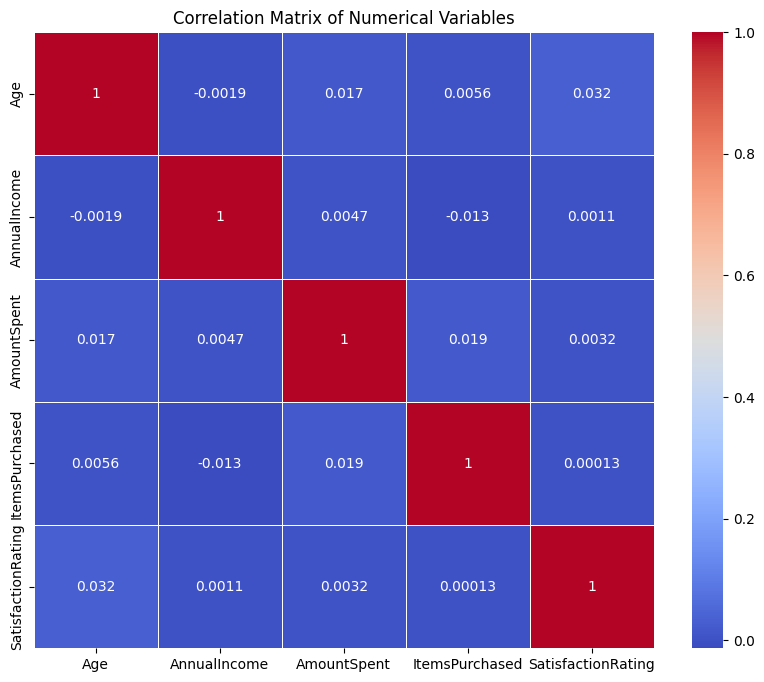

In [ ]:
numerical_df = df.select_dtypes(include=np.number).drop(columns=['CustomerID'])

corr_matrix = numerical_df.corr()

max_corr = corr_matrix.stack().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


Between these features there is no strong coorelation. So I can assume that if we build any **predictive model** based on these features, it won't be that much effective.

In [ ]:
# Exclude self-correlations (correlation value of 1)
filtered_max_corr = max_corr[max_corr < 1]

# Max positive correlation (excluding 1)
max_positive_corr = filtered_max_corr.head(2)

# Max negative correlation
max_negative_corr = max_corr.tail(2)

# Correlation close to 0 (absolute value is close to 0)
zero_corr_threshold = 0.01 # Define a threshold for near-zero correlation
near_zero_corr = max_corr[abs(max_corr) < zero_corr_threshold].drop_duplicates()


print("Features with maximum positive correlation (excluding 1):")
print(max_positive_corr)

print("\nFeatures with maximum negative correlation:")
print(max_negative_corr)

print("\nFeatures with correlation close to 0:")
print(near_zero_corr)

Features with maximum positive correlation (excluding 1):
SatisfactionRating  Age                   0.031973
Age                 SatisfactionRating    0.031973
dtype: float64

Features with maximum negative correlation:
AnnualIncome    ItemsPurchased   -0.013215
ItemsPurchased  AnnualIncome     -0.013215
dtype: float64

Features with correlation close to 0:
Age                 ItemsPurchased        0.005605
AmountSpent         AnnualIncome          0.004665
                    SatisfactionRating    0.003234
SatisfactionRating  AnnualIncome          0.001100
                    ItemsPurchased        0.000127
Age                 AnnualIncome         -0.001926
dtype: float64


In [43]:
# Cross-tabulation: Gender vs. Returned

gender_returned_ct = pd.crosstab(df['Gender'], df['Returned'])
print(gender_returned_ct)

print('-' * 40)

# Cross-tabulation: Membership vs. SatisfactionRating

membership_satisfaction_ct = pd.crosstab(df['Membership'], df['SatisfactionRating'])
print(membership_satisfaction_ct)

Returned   No  Yes
Gender            
Female    373   66
Male      395   66
Other      84   16
----------------------------------------
SatisfactionRating   1    2   3    4    5
Membership                               
Gold                42   39  38   47   43
Platinum            25   18  22   15   15
Regular             88  105  87  106  108
Silver              38   47  32   44   41


**Gender vs. Returned**

Male and Female number is close enough but their return value is same. That means there is gender biasness to return any product.

**Membership vs. SatisfactionRating**

Again regular member is more satisfied than premium members which is odd. It should have been reversed.

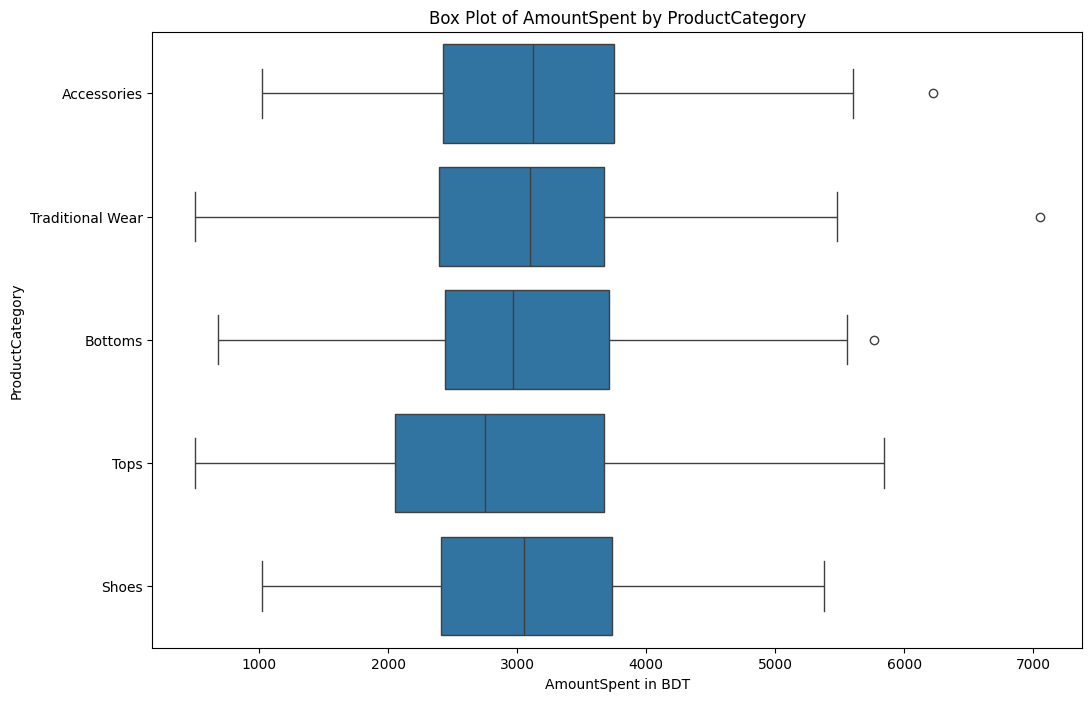

In [44]:
# Box plot comparing AmountSpent across Product Categories

plt.figure(figsize=(12, 8))
sns.boxplot(x='AmountSpent', y='ProductCategory', data=df)
plt.title('Box Plot of AmountSpent by ProductCategory')
plt.xlabel('AmountSpent in BDT')
plt.ylabel('ProductCategory')
plt.show()

Here, for all the product categories amount spent value is nearly 3000 bdt, no significance difference between any product categories.

In [50]:
# 1. Chi-Squared Test: Gender vs. Returned

chi2, p_value, dof, expected = chi2_contingency(gender_returned_ct)

print("Chi-Squared Test - Gender vs. Returned")
print(f"Chi-Squared Statistic: {chi2}\n")
print(f"P-value: {p_value}")


# For the interpretation let's say alpha = 0.05 means 5%

alpha = 0.05
if p_value < alpha:
  print(f"Since the p_value:{p_value} is less than alpha:{alpha}.\nReject the null hypothesis. There is a significant association between Gender and Returned.")
else:
  print(f"Since the p_value:{p_value} is greater than alpha:{alpha}.\nFail to reject the null hypothesis. There is no significant association between Gender and Returned.")

Chi-Squared Test - Gender vs. Returned
Chi-Squared Statistic: 0.2186834952635056

P-value: 0.8964240143609901
Since the p_value:0.8964240143609901 is greater than alpha:0.05.
Fail to reject the null hypothesis. There is no significant association between Gender and Returned.


In [51]:
# 2. Independent T-test: AmountSpent between Genders

male_amount_spent = df[df['Gender'] == 'Male']['AmountSpent']
female_amount_spent = df[df['Gender'] == 'Female']['AmountSpent']

# print(male_amount_spent)
# print(female_amount_spent)

t_statistic, p_value = ttest_ind(male_amount_spent, female_amount_spent)

print("\nIndependent T-test - AmountSpent between Genders")
print(f"T-Statistic: {t_statistic}\n")
print(f"P-value: {p_value}")

if p_value < alpha:
  print(f"Since the p_value:{p_value} is less than alpha:{alpha}.\nReject the null hypothesis. There is a significant difference in AmountSpent between Genders.")
else:
  print(f"Since the p_value:{p_value} is greater than alpha:{alpha}.\nFail to reject the null hypothesis. There is no significant difference in AmountSpent between Genders.")


Independent T-test - AmountSpent between Genders
T-Statistic: 0.38198868096490435

P-value: 0.7025601365457745
Since the p_value:0.7025601365457745 is greater than alpha:0.05.
Fail to reject the null hypothesis. There is no significant difference in AmountSpent between Genders.


In [55]:
# 3. ANOVA: AmountSpent across Membership levels

membership_levels = df['Membership'].unique()

# group_data = [df[df['Membership'] == level]['AmountSpent'] for level in membership_levels]

group_data = []
for level in membership_levels:
    amount_spent_for_level = df[df['Membership'] == level]['AmountSpent']
    group_data.append(amount_spent_for_level)

f_statistic, p_value = f_oneway(*group_data)

print("\nANOVA - AmountSpent across Membership levels")
print(f"F-Statistic: {f_statistic}\n")
print(f"P-value: {p_value}")

if p_value < alpha:
  print(f"Since the p_value:{p_value} is less than alpha:{alpha}.\nReject the null hypothesis. There is a significant difference in AmountSpent across Membership levels.")
else:
  print(f"Since the p_value:{p_value} is greater than alpha:{alpha}.\nFail to reject the null hypothesis. There is no significant difference in AmountSpent across Membership levels.")


ANOVA - AmountSpent across Membership levels
F-Statistic: 1.9490009303279354

P-value: 0.12003272655215201
Since the p_value:0.12003272655215201 is greater than alpha:0.05.
Fail to reject the null hypothesis. There is no significant difference in AmountSpent across Membership levels.


In [58]:
# 5.1 Preparing the data for regression

features = ['Age', 'AnnualIncome', 'ItemsPurchased', 'Membership', 'Gender']
X = df[features]

# Target column is AmountSpent
y = df['AmountSpent']

# Convert categorical variables into dummy/indicator variables (one-hot encoding)
X = pd.get_dummies(X, columns=['Membership', 'Gender'], drop_first=True)

# Add a constant (or intercept) to our model. This is a standard practice in regression.
X = sm.add_constant(X)

print(X.head())


   const  Age  AnnualIncome  ...  Membership_Silver  Gender_Male  Gender_Other
0    1.0   33        573959  ...              False         True         False
1    1.0   18       1282335  ...              False        False          True
2    1.0   35       1103278  ...              False        False         False
3    1.0   38        920423  ...              False        False         False
4    1.0   37        814407  ...              False         True         False

[5 rows x 9 columns]


In [59]:
# 5.2 Build the model and view the summary

# Convert boolean values in 0s and 1s
X = X.astype(int)

# Create the OLS model
model = sm.OLS(y, X)

# Fit the model to our data
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            AmountSpent   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.625
Date:                Fri, 18 Jul 2025   Prob (F-statistic):              0.113
Time:                        16:48:15   Log-Likelihood:                -8318.0
No. Observations:                1000   AIC:                         1.665e+04
Df Residuals:                     991   BIC:                         1.670e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2834.4964    

Here, **R-squared of 0.013** means that our selected features only explain 1.3% of the variation in the amount of spends.

p_value 0.113 is greater than 0.05. This confirms that the overall model is not statistically significant.

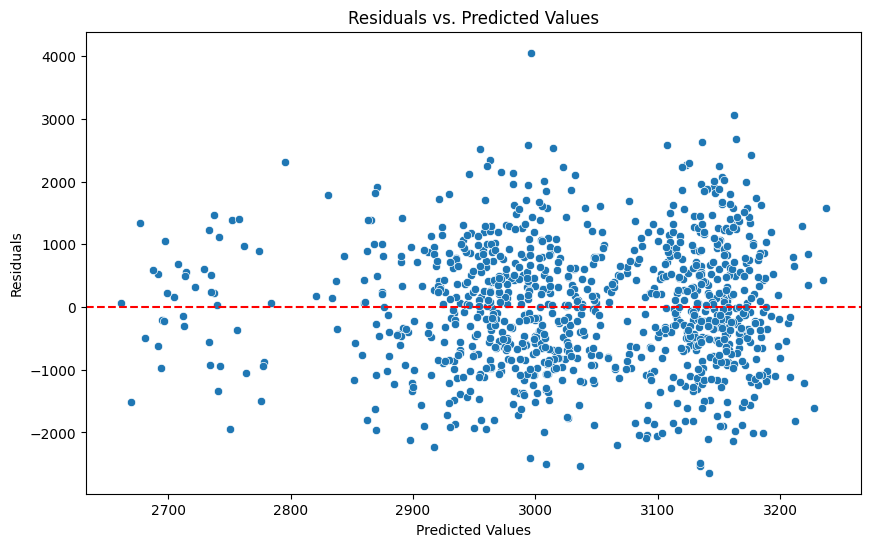

In [60]:
# 5.3 Plotting residuals to check model assumptions

predicted_values = results.predict(X)

residuals = y - predicted_values

plt.figure(figsize=(10, 6))
sns.scatterplot(x=predicted_values, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In the previous step, the R-squared (0.013) told us that our model has very poor predictive power. This residual plot adds another layer to that story. It tells us that while the model is weak, it is not statistically invalid on its face. The problem isn't that a linear model is the wrong type of model for these features; the problem is that these features (Age, AnnualIncome, etc.) simply do not have a strong linear relationship with AmountSpent in the first place.

In [61]:
# The Final Report and Interpretation

# Statistical Analysis Report: Fashion E-commerce Customer Behavior  
**Date:** July 18, 2025  
**Author:** Md. Anwar Hossain  
**Data Source:** retail_fashion_dataset.xlsx (1,000 Transactions)  

## 1. Executive Summary  
This report presents a statistical analysis of customer and transaction data for our fashion e-commerce platform. The analysis aimed to understand customer spending habits, evaluate the impact of our loyalty program and customer demographics on sales, and analyze product return behavior.  

The key conclusion is that while customer spending is predictable and consistent, it is not strongly influenced by traditional demographic factors like age, gender, or annual income. Furthermore, the analysis reveals a critical insight: our current Membership loyalty program is not effectively driving higher spending from premium-tier members. Product return rates do not show a statistically significant link to gender.  

Based on these findings, we recommend:  
- A strategic shift from demographic-based targeting towards a more sophisticated, behavior-driven approach  
- A comprehensive review of the Membership program's value proposition  

## 2. Key Findings  
Our analysis of 1,000 customer transactions yielded the following key findings:  

### Customer Profile:  
- The primary customer base consists of young to middle-aged adults, with an average age of 33 years. The middle 50% of customers are aged between 26 and 39.  
- The business caters to a wide range of income levels, with an average annual income of approximately 797,505 BDT.  

### Purchase Behavior:  
- The average amount spent per transaction is 3,038 BDT. The spending distribution is bell-shaped, indicating that most transactions are clustered around this average, making spending behavior highly predictable.  
- The most popular product categories are Bottoms, and Traditional Wear, with relatively even purchase frequency among them. 'Shoes' is the least purchased category.  
- Credit Card is the most frequently used payment method, followed closely by the mobile payment system bKash.  

### Statistical Insights:  
- There is no statistically significant difference in the average amount spent between male and female customers (p-value = 0.7026).  
- There is no statistically significant difference in the average amount spent across the different Membership tiers (Regular, Silver, Gold, Platinum) (p-value = 0.1200).  
- A multiple linear regression model attempting to predict AmountSpent using demographics and membership data had very poor predictive power (R-squared = 1.3%), confirming that these factors are not strong drivers of transaction value.  

### Return Behavior:  
- There is no statistically significant relationship between a customer's gender and their likelihood of returning a product (p-value = 0.8964).  

## 3. Actionable Insights & Recommendations  

### i) Customer Spending Behavior  
**Insight:** Customer spending is consistent and predictable, clustering around a mean of ~3,038 BDT. However, it is not strongly correlated with customer age or income.  

**Recommendation 1 (Upselling):** Implement strategies to increase the Average Transaction Value (ATV). Set promotional thresholds slightly above the average spend, such as offering "free shipping on orders over 3,500 BDT" or a "10% discount on orders over 4,000 BDT" to encourage customers to add one more item to their cart.  

**Recommendation 2 (Shift to Behavioral Targeting):** Since demographics are poor predictors, the business should enhance data collection to focus on behavioral attributes. Track metrics like products viewed, time spent on page, and cart abandonment rates. Use this data to build a recommendation engine and personalize marketing efforts based on what customers do, not just who they are.  

### ii) Impact of Membership and Demographics on Sales  
**Insight:** The analysis provides strong evidence that the current multi-tiered Membership program is not effective at encouraging higher spending. Platinum and Gold members do not spend significantly more than Regular members.  

**Recommendation 1 (Strategic Program Review):** Conduct an immediate and thorough review of the loyalty program. The program is currently a cost center without a clear return on investment in terms of increased sales from premium members.  

**Recommendation 2 (Enhance Premium Tiers):** The value proposition for Gold and Platinum tiers must be strengthened. Consider introducing benefits that directly encourage spending, such as exclusive access to new collections, higher points multipliers on purchases, or personalized styling services. The goal is to make achieving a higher tier a tangible driver of increased customer value.  

### iii) Return Behavior Analysis  
**Insight:** Product returns are not significantly linked to customer gender.  

**Recommendation 1 (Focus on Universal Causes):** Do not allocate resources to gender-specific return-reduction strategies. Instead, focus on universal drivers of returns.  

**Recommendation 2 (Improve Product Information):** Invest in improving product information across the board. This includes more detailed sizing charts (with model measurements for reference), higher-quality product videos, and customer-submitted photos to provide a more accurate representation of fit and quality, which are common reasons for returns in fashion e-commerce.  